# Práctica 1: Máquinas de Vectores de Soporte

Inteligencia de Datos

Universidad Iberoamericana Ciudad de México

Creado por: Luis Norberto Zúñiga Morales, inspirado en el libro *Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow*.



---



Las Máquinas de Vectores de Soporte (MVS) son un modelo de Machine Learning poderoso y versátil. Se pueden utilizar en problemas de clasificación y regresión tanto en problemas donde los datos sean o no linealmente separables. Como vimos en clase, las MVS se inician con un planteamiento donde los datos son linealmente separables, dando origen al caso del margen duro. Después, el margen suave permite atacar problemas donde los datos no son linealmente separables al considerar una penalización en la función de costo. Finalmente, para atacar la no linealidad de los datos, se introdujo el truco del Kernel.

## Máquinas de Vectores de Soporte: Caso Lineal

Vamos a empezar con un pequeño ejemplo de aplicación con el famoso conjunto de datos de Iris.

**Actividad**: Visitar el [siguiente enlace](https://archive.ics.uci.edu/dataset/53/iris) donde se encuentra una descripción de este conjunto de datos. Escribir en la celda de abajo lo siguiente:

- ¿Cuántos datos conforman este dataset?
- ¿Cuántas características tiene cada punto de dato?
- ¿Qué tipo de problema se debe resolver con estos datos?
- ¿Qué tipo de características son las que conforman estos datos?

*Su respuesta en esta celda*

Recuerden que scikit-learn tiene ciertos conjuntos de datos emblemáticos disponibles en su librería para cargarlos fácilmente en sus proyectos. Afortunadamente, el conjunto de Iris se encuentra entre ellos. Vamos a importar las librerías necesarias, cargar los datos, y separarlos en dos variables: `X` (características) y `y` (clase).

Por el momento vamos a considerar solo dos características (ancho y largo del pétalo) por cuestiones de visualización; además, consideraremos casos de clasificación binaria, por lo que usaremos solo los datos de dos flores (setosa y versicolor).

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Vamos a separar los datos según las restricciones descritas anteriormente:

In [ ]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

Lo primero que vamos a hacer es graficar la idea del margen duro de la MVS, que ya vimos en clase. Para esto, vamos a entrenar un modelo usando la implementación de la MVS de scikit-learn.

**Actividad**: Revisen la [documentación de la MVS](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) en scikit-learn y escriban qué hacen los primeros cuatro parámetros del modelo.

*Su respuesta en esta celda*

Vamos a entrenar el modelo lineal con los datos:

In [ ]:
svm_clf = SVC(kernel="linear", C=10)
svm_clf.fit(X, y)

SVC(C=10, kernel='linear')

Una vez entrenado nuestro modelo de clasificación, es posible acceder a algunos atributos. Por ejemplo, los coeficientes del modelo lineal:

In [ ]:
svm_clf.coef_

array([[1.29411744, 0.82352928]])

En este caso, estos números representan el peso asignado a cada característica (ancho y largo del pétalo) en el modelo lineal.

Otro atributo sería el intercepto o los valores constantes de la función de decisión:

In [ ]:
svm_clf.intercept_

array([-3.78823471])

Vamos a definir una función auxiliar para graficar los distintos márgenes de decisión que se crearon al entrenar el modelo anterior:

In [ ]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # En el borde de decision, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

Ahora, usamos la función anterior para graficar nuestro modelo entrenado con los puntos del conjunto de datos:

(0.0, 5.5, 0.0, 2.0)

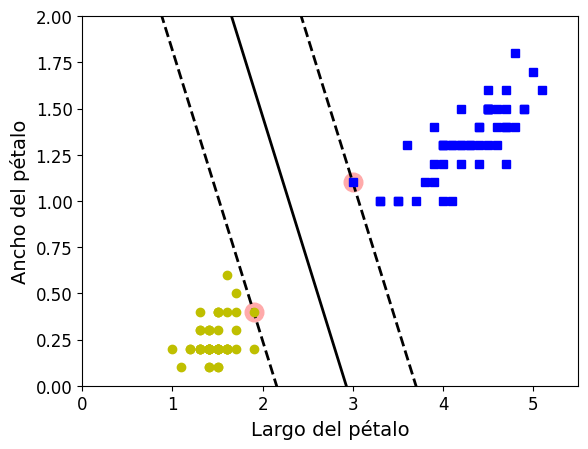

In [ ]:
plt.figure()
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Largo del pétalo", fontsize=14)
plt.ylabel("Ancho del pétalo", fontsize=14)
plt.axis([0, 5.5, 0, 2])

Otro detalle que debemos considerar con la MVS es que son sensibles a la escala de los datos numéricos. Por ejemplo, consideren el siguiente ejemplo:

(-2.0, 2.0, -2.0, 2.0)

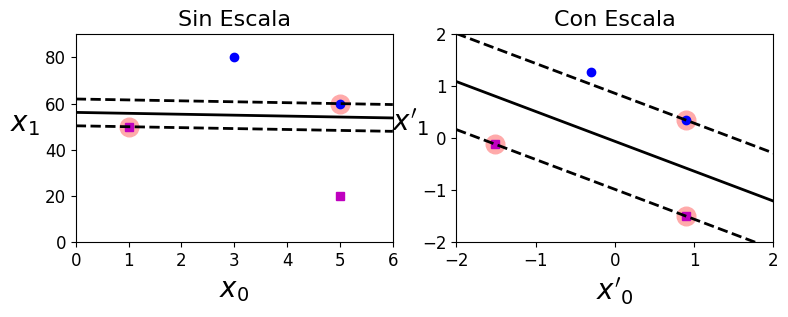

In [ ]:
# creamos puntos de forma artifical
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

# entrenamos el modelo lineal
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

# graficamos los puntos y el modelo SIN escala creado por la MVS
plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Sin Escala", fontsize=16)
plt.axis([0, 6, 0, 90])

# escalamos los puntos usando el modulo de preprocesamiento StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

# graficamos los puntos y el modelo CON escala creado por la MVS
plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Con Escala", fontsize=16)
plt.axis([-2, 2, -2, 2])

**Actividad**: Buscar en la documentación de Scikit-learn sobre `StandardScaler()` y escribir qué es lo que hace en la celda de texto abajo.

## Caso del Margen Suave

Como vimos en clase, el parámetro $C$ permite obtener un modelo más flexible ante casos donde los datos no son linealmente separables. Recuerden que el margen duro tiene sus problemas:

* Solo funciona si los datos son linealmente separables.
* Es susceptible a *outliers*.

La idea ahora es considerar un modelo flexible que encuentre un balance entre hacer el margen de decisión lo más ancho posible y evitar las violaciones a dicho margen, es decir, puntos que queden dentro del margen o del lado equivocado.







---



Primero, vamos a introducir el concepto de los [Pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), o tuberías, para escalar los datos. La idea de un *Pipeline* es que abstrae la idea de aplicar ciertas transformaciones a los datos uniformemente dentro del esquema de procesamiento de datos, el cual culmina en un estimador (modelo de clasificación o regresión).

In [ ]:
X = iris["data"][:, (2, 3)]  # ancho y largo del petalo
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica vs las demas

In [ ]:
print(X)

In [ ]:
print(y)

In [ ]:
svm_clf_iv = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf_iv.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

En el Pipeline anterior, los datos entran a la tubería donde el primer paso es que se transforman con el `StandardScaler`. Cuando terminan de pasar por ese punto, se van al siguiente, que en este caso es el modelo de clasificación: una `LinearSVC`.

Realizamos una predicción para un nuevo dato:

In [ ]:
svm_clf_iv.predict([[5.5, 1.7]])

array([1.])

El siguiente código implementa una visualización del efecto que el valor de $C$ ocasiona al querer separar nuestros datos del conjunto de datos Iris:

In [ ]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

In [ ]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [ ]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

(4.0, 5.9, 0.8, 2.8)

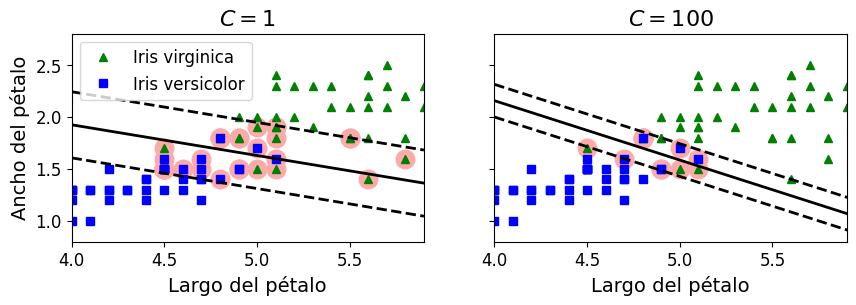

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Largo del pétalo", fontsize=14)
plt.ylabel("Ancho del pétalo", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Largo del pétalo", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

## Máquina de Vectores de Soporte: Clasificación No Lineal

Una forma de lidiar con el problema de datos que no son linealmente separables es añadir más características. Un buen candidato son las características polinomiales (por ejemplo, la multiplicación de varias características entre sí, elevar al cuadrado, etc.).

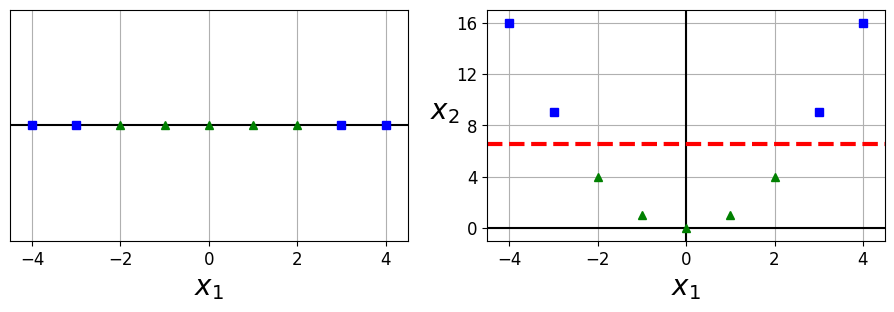

In [ ]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1) # creamos un arreglo de numero del -4 a 4 con 9 particiones
X2D = np.c_[X1D, X1D**2] # utilizamos el arreglo anterior, donde la segunda entrada se eleva al cuadrado
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0]) # vector de clases para cada punto en X1D y X2D

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

Vamos a implementar esta idea con un Pipeline usando el transformador de datos `PolynomialFeatures`, seguido de un `StandardScaler` y una MVS lineal, todo con un dataset no lineal que crearemos con la función `make_moons`.

Primero, creamos el nuevo conjunto de datos y lo graficamos para verificar la no linealidad del problema:

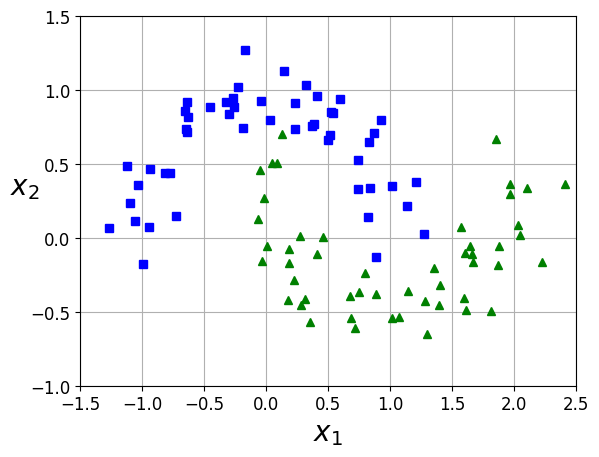

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Después, vamos a crear el pipeline como se definió anteriormente. Recuerden que el modelo es una MVS lineal.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(C=10, kernel = 'linear'))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', SVC(C=10, kernel='linear'))])

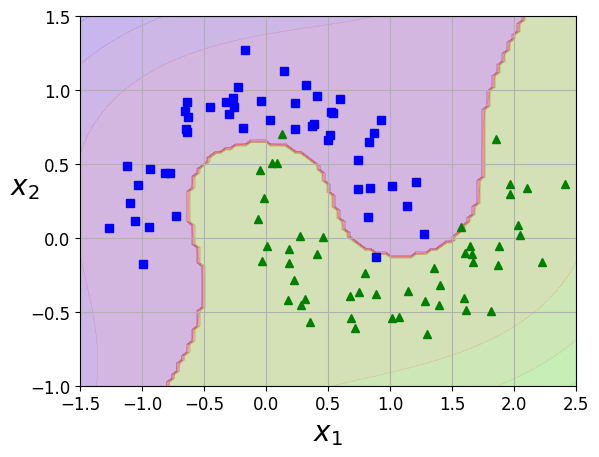

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### Kernel Polinomial

Afortunadamente, tenemos el truco del kernel para realizar transformaciones a los datos, similar a lo que hicimos con el transformador de `PolynomialFeatures`. El primero que vamos a analizar es el kernel polinomial de grado 3.

**Actividad**: Escriban la fórmula del kernel polinomial.

*Su respuesta en esta celda*

In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

Despúes, vamos a entrenar uno de grado 10.

In [ ]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

Vamos a comparar los márgenes de decisión que generan ambos modelos:

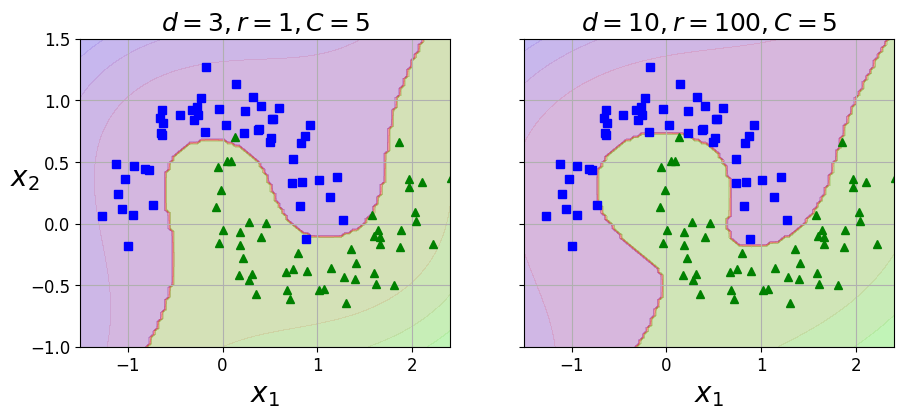

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")
plt.show()

En los ejemplos anteriores, `coef0` ($r$), controla que tanto del modelo es influenciado por polinomios de alto grado contra polinomios de grado bajo. Además, recuerden que usar modelos muy complejos puede llevar al sobreajuste.

**Actividad**: ¿Qué observan en la gráfica anterior?

Otra forma de atacar lo no linealidad de los datos es añadir características mediante una función de similitud, que mide que tanto cada instancia se parece a un punto de referencia en particular. Por ejemplo, consideremos los puntos en $\mathbb{R}$ usados anteriormente. Vamos a añadir dos puntos de referencia $x^{'} = -2$ y $x^{''} = 1$. Después, vamos a definir nuestra función de similitud, la función de base radial Gaussiana (RBF):

$$\phi_\gamma (x,l) = \exp{(-\gamma ||x-l||^2)}$$

Esta función tiene forma de campana (se parece mucho a otra cosa, ¿no creen?), que varía desde 0 (muy lejos del punto de referencia) hasta 1 (muy cerca o exactamente en el punto de referencia).

¿Cómo se determinan las nuevas características? Consideremos el caso de $x = 1$. Este se ubica a una distancia de 1 de $x^{'}$ y a 2 de $x^{''} $. Por lo tanto, sus nuevas características son, usando un valor de $\gamma = 0.3$, $x_2 = \exp{(-0.3\times 1^2)}\approx 0.74$ y $x_3 = \exp{(-0.3\times 2^2)} \approx 0.3$.

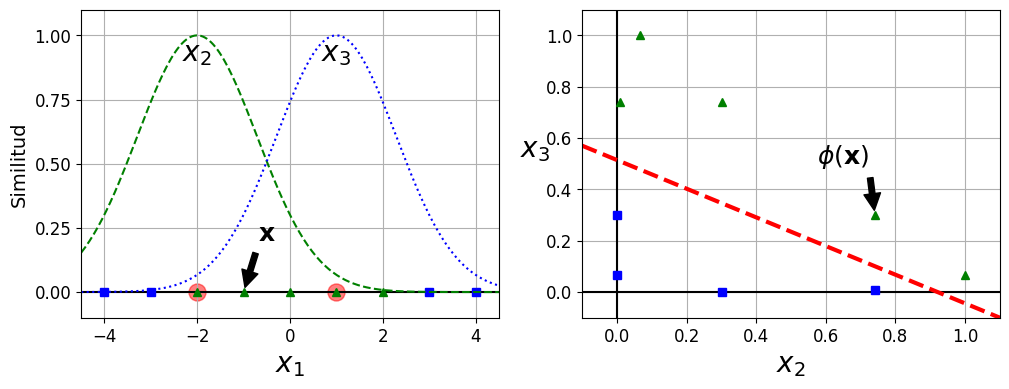

In [ ]:
# definimos el kernel RBF manualmente
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

# valor de gamma
gamma = 0.3

# los puntos x's donde graficamos
x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similitud", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])

plt.subplots_adjust(right=1)
plt.show()

### Kernel RBF Gaussiano

El problema de usar este kernel yace en que determinar las nuevas características puede ser caro computacionalmente, especialmente en conjuntos de datos grandes. Al igual que en el caso del kernel polinomial, se puede especificar al momento de entrenar una MVS:

In [ ]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

Vamos a observar el efecto que tienen distintos valores de los hiperparámetros $\gamma$ y $C$ en el modelo de clasificación:

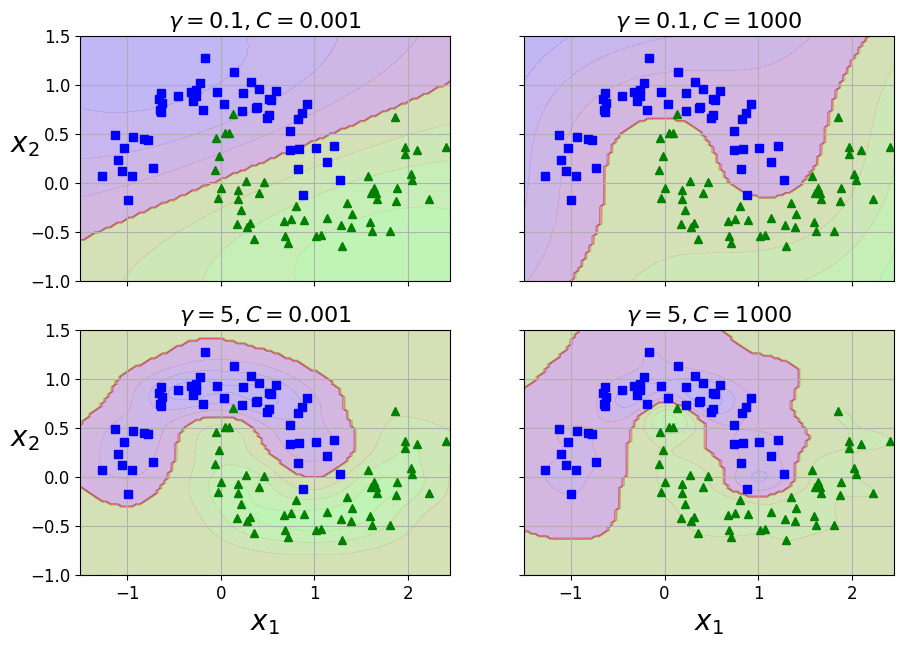

In [ ]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

**Actividad**: Al observar las gráficas anteriores, ¿qué efecto causa un valor grande y pequeño de $\gamma$? ¿Qué efecto causa un valor grande y pequeño de $C$?

*Su respuesta en esta celda*

## Conclusiones



1. Las MVS son versátiles ya que el truco de kernel permite utilizar distintas ideas para aumentar características de forma sencilla.
2. ¿Qué kernel usar de entre todos los existentes? Una buena regla es empezar con el kernel lineal, que da resultados aceptables en general sin muchas complicaciones. Después, usar el kernel RBF, ya que da buenos resultados para múltiples problemas, aunque puede tardar mucho más.
3. Si tienen otro tipo de información, puede ser de utilidad emplear otros kernels. Por ejemplo, el *string kernel* permite trabajar con texto o secuencias de ADN.



## Ejercicios

- Entrenen una MVS con kenerl lineal, polinomial y RBF con el
conjunto de datos de dígitos escritos a mano disponible en la librería de scikit-learn ([revisar esto](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)).
- Usando la métrica F1, comparen el rendimiento de los modelos entrenados anteriormente y escriban sus conclusiones.